### Import libraries

In [1]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import ipywidgets as widgets
from ipywidgets import interact, interact_manual

### Merging CSV files

In [2]:
"""#all csv
csv_files = ["diskmags1.csv", "diskmags2.csv", "diskmags3.csv", "diskmags4.csv", "diskmags5.csv"]

#empty list
dataframes = []

#read and append
for csv_file in csv_files:
    df = pd.read_csv(csv_file)
    dataframes.append(df)

#combine dataframes
combine_df = pd.concat(dataframes, ignore_index=True)

#save df
combine_df.to_csv("full_data.csv", index=False)"""

'#all csv\ncsv_files = ["diskmags1.csv", "diskmags2.csv", "diskmags3.csv", "diskmags4.csv", "diskmags5.csv"]\n\n#empty list\ndataframes = []\n\n#read and append\nfor csv_file in csv_files:\n    df = pd.read_csv(csv_file)\n    dataframes.append(df)\n\n#combine dataframes\ncombine_df = pd.concat(dataframes, ignore_index=True)\n\n#save df\ncombine_df.to_csv("full_data.csv", index=False)'

### Show the data frame

In [3]:
df = pd.read_csv('all_data.csv', encoding="utf16", sep=",")
df.head()

,Title,Magazine[Language],Magazine[Origin],Magazine[Start date],Magazine[End date],Magazine[Systems],Magazine[Issues],Magazine[Source]
0,#Z80,Russian,Russia,07.05.1998,09.03.2000,ZX Spectrum,#Z80 #01; #Z80 #02; #Z80 #03; #Z80 #04; #Z80 #...,ZXpress
1,/FROZEN/ magazine,NaN,NaN,07.08.1999,07.08.1999,MS-DOS,/FROZEN/ magazine,Internet Archive
2,11th,NaN,NaN,11.11.1997,11.11.1997,MS-DOS,11th #1,Demozoo
3,17 Bit Catalogue Disk,English,NaN,01.03.1990,01.03.1990,AMIGA,17 Bit Catalogue Disk - March/April 1990,Internet Archive
4,20,Russian,Russia,12.12.1999,17.12.2001,ZX Spectrum,20 #01; 20 #02; 20 #03; 20 #04; 20 #05,ZXpress


In [4]:
df.columns = ['Title', 'Language', 'Origin', 'Start Date', 'End Date', 'Systems', 'Issues', 'Source']
df.head()

,Title,Language,Origin,Start Date,End Date,Systems,Issues,Source
0,#Z80,Russian,Russia,07.05.1998,09.03.2000,ZX Spectrum,#Z80 #01; #Z80 #02; #Z80 #03; #Z80 #04; #Z80 #...,ZXpress
1,/FROZEN/ magazine,NaN,NaN,07.08.1999,07.08.1999,MS-DOS,/FROZEN/ magazine,Internet Archive
2,11th,NaN,NaN,11.11.1997,11.11.1997,MS-DOS,11th #1,Demozoo
3,17 Bit Catalogue Disk,English,NaN,01.03.1990,01.03.1990,AMIGA,17 Bit Catalogue Disk - March/April 1990,Internet Archive
4,20,Russian,Russia,12.12.1999,17.12.2001,ZX Spectrum,20 #01; 20 #02; 20 #03; 20 #04; 20 #05,ZXpress


In [5]:
#create a new column "Duration" to show how long the magazine existed
df["Start Date"] = pd.to_datetime(df['Start Date'], format='%d.%m.%Y')
df["End Date"] = pd.to_datetime(df['End Date'], format='%d.%m.%Y')
df["Duration"] = df["End Date"] - df["Start Date"]
df

,Title,Language,Origin,Start Date,End Date,Systems,Issues,Source,Duration
0,#Z80,Russian,Russia,1998-05-07,2000-03-09,ZX Spectrum,#Z80 #01; #Z80 #02; #Z80 #03; #Z80 #04; #Z80 #...,ZXpress,672 days
1,/FROZEN/ magazine,NaN,NaN,1999-08-07,1999-08-07,MS-DOS,/FROZEN/ magazine,Internet Archive,0 days
2,11th,NaN,NaN,1997-11-11,1997-11-11,MS-DOS,11th #1,Demozoo,0 days
3,17 Bit Catalogue Disk,English,NaN,1990-03-01,1990-03-01,AMIGA,17 Bit Catalogue Disk - March/April 1990,Internet Archive,0 days
4,20,Russian,Russia,1999-12-12,2001-12-17,ZX Spectrum,20 #01; 20 #02; 20 #03; 20 #04; 20 #05,ZXpress,736 days
...,...,...,...,...,...,...,...,...,...
2496,ZZTurbo / ZPower Catalog,NaN,NaN,1995-11-07,1995-11-07,MS-DOS,ZZTurbo / ZPower Catalog 1996,Internet Archive,0 days
2497,ZZTV magazine,NaN,NaN,1999-01-03,2016-08-24,MS-DOS,ZZTV magazine #1; ZZTV magazine #10; ZZTV maga...,Internet Archive,6443 days
2498,zzZACK64,English; German,German,1992-01-01,1992-01-01,Commodore 64,zzZACK64 2 (1992)( )(de); zzZACK64 4 (1992)( )...,Internet Archive; Kultboy,0 days
2499,ZZZine,NaN,NaN,1995-11-13,1995-12-21,MS-DOS,ZZZine #1; ZZZine #2,Internet Archive,38 days


In [6]:
@interact
def show_articles_more_than(column='Duration', days=""):
    return df.loc[df[column] > days]

interactive(children=(Text(value='Duration', description='column'), Text(value='', description='days'), Output…

### Finding a specific entry

In [7]:
#Enter Magazine, Language, Origin, Systems or Source...
field = input("Enter Title, Language, Origin, Systems or Source...")

#filter with input
if field == "Title":
    magazine = input("Enter a magazine title: ")
    filtered_df = df.query('Magazine == @magazine')
elif field == "Language":
    language = input("Enter language: ")
    filtered_df = df.query('Language == @language')
elif field == "Origin":
    origin = input("Enter origin: ")
    filtered_df = df.query('Origin == @origin')
elif field == "Systems":
    systems = input("Enter systems: ")
    filtered_df = df.query('Systems == @systems')
elif field == "Source":
    source = input("Enter source: ")
    filtered_df = df.query('Source == @source')
else:
    "No concrecte output!"

#print the filtered df
filtered_df


Enter Title, Language, Origin, Systems or Source...Origin
Enter origin: Poland


,Title,Language,Origin,Start Date,End Date,Systems,Issues,Source,Duration
92,Amber,English,Poland,1998-01-01,1999-12-01,MS-DOS,Amber; Amber 1; Amber 2; Amber1; Amber2,Demozoo; Internet Archive; Pouet; Volko Encycl...,699 days
195,Bad News (2),English; Polish,Poland,1992-06-21,1996-04-05,MS-DOS; MS-Dos/gus,Bad News #0; Bad News #1; Bad News #2; bad new...,Demozoo; Pouet; Volko Encyclopedia,1384 days
297,Budyn,English; Polish,Poland,1996-06-01,2002-09-01,MS-DOS; WINDOWS,Budyn 1; Budyn 2; Budyn 3; Budyn 4; Budyn 5; b...,Demozoo; Pouet; Volko Encyclopedia,2283 days
543,December Pack,Polish,Poland,1999-12-01,1999-12-01,Commodore 64,December Pack,Pouet,0 days
544,DedFisz,Polish,Poland,1998-03-08,1998-03-08,AMIGA AGA,DedFisz 1,Demozoo,0 days
627,Dragon,English; Polish,Poland,1997-04-01,1999-09-25,MS-DOS; MS-Dos/gus,Dragon #4; dragon #5; Dragon 1; Dragon 2: Godz...,Demozoo; Pouet; Volko Encyclopedia,907 days
781,Flash (2),Polish,Poland,1995-05-07,1995-05-07,Commodore 64,Flash #1/95 (polish),CSDB,0 days
876,Glos Lamera,Polish,Poland,1992-01-01,1992-06-01,AMIGA OCS/ECS,"Glos Lamera 1; Glos Lamera 2; Glos Lamera 3,4",Demozoo,152 days
971,Hooy Mag,Polish,Poland,NaT,NaT,ZX Spectrum,; HOOY MAG #1; HOOY MAG #2,Pouet; ZXpress,NaT
1504,Paczka Tynku,Polish,Poland,NaT,NaT,ATARI 8 BIT; Atari XL/XE,Paczka Tynku #1; Paczka Tynku #2; Paczka Tynku...,Demozoo; Pouet,NaT


### Showing the unique values in our columns

In [8]:
df["Language"].unique()

array(['Russian', nan, 'English', 'English; German', 'Polish',
       'English; Polish', 'German', 'English; Russian',
       'English; Spanish', 'Dutch', 'English; Slovenian',
       'English; Hungarian', 'French; English', 'English; French',
       'Latvian', 'Swedish', 'Czech; English', 'Hungarian',
       'English; Turkish', 'German; German', 'French', 'Dutch; English',
       'Greek', 'English; German; Norwegian', 'Czech', 'Serbian'],
      dtype=object)

In [9]:
df["Origin"].unique()

array(['Russia', nan, 'Ukraine', 'Belarus', 'Poland', 'Germany', 'Irland',
       'Belgium', 'Slovenia', 'Sweden', 'Israel', 'The Netherlands',
       'Denmark', 'Norway', 'France', 'Paraguay', 'Portugal', 'USA',
       'Latvia', 'Hungary', 'Spain', 'Finland', 'Austria', '08.09.1997',
       'Switzerland', 'South Africa', 'Great Britain', 'Latin America',
       'Polish', 'Uzbekistan', 'Australia', 'Czech Republic', 'Serbia',
       'German'], dtype=object)

In [10]:
df["Systems"].unique()

array(['ZX Spectrum', 'MS-DOS', 'AMIGA', 'Commodore 64',
       'ATARI 8 BIT; Atari XL/XE', 'AMIGA AGA; AMIGA OCS/ECS',
       'AMIGA OCS/ECS', 'MS-DOS; WINDOWS', 'Java', 'APPLE II',
       'ATARI ST/E', 'Atari ST', 'AMIGA AGA',
       'ATARI FALCON; Atari ST; ATARI ST/E', 'Atari ST; ATARI ST/E',
       'ATARI 8 BIT', 'Amiga', 'AMIGA AGA; AMIGA PPC/RTG',
       'AMIGA OCS/ECS; WINDOWS', 'AMSTRAD CPC', 'BROWSER; Javascript',
       'MS-DOS; MS-Dos/gus', 'WINDOWS', 'ATARI FALCON', 'Atari', 'PAPER',
       'C16/116/plus4', 'AMIGA OCS/ECS; Commodore 64',
       'Nintendo SNES/Super FamiCom', 'NEC PC ENGINE',
       'AMIGA OCS/ECS; AMIGA PPC/RTG', 'AMIGA OCS/ECS; PAPER', nan, 'MSX',
       'Atari ST; Atari ST/E', 'SAM COUPÉ',
       'AMIGA AGA; AMIGA OCS/ECS; AMIGA PPC/RTG; LINUX; WINDOWS',
       'AMSTRAD CPC; Amstrad Plus', 'MS-DOS; MS-Dos/gus; WINDOWS',
       'GAMEPARK 32; GP32', 'Amiga OCS/ECS', 'ATARI FALCON; ATARI ST/E',
       'AMIGA PPC/RTG; BEOS; MS-DOS; WINDOWS', 'LINUX; WINDOWS'

In [11]:
df["Source"].unique()

array(['ZXpress', 'Internet Archive', 'Demozoo',
       'CSDB; Internet Archive; Pouet', 'Demozoo; ZXpress',
       'Demozoo; Pouet', 'Pouet',
       'CSDB; Demozoo; Internet Archive; Pouet', 'CSDB',
       'Internet Archive (Apple II)', 'Demozoo; Internet Archive; Pouet',
       'CSDB; Internet Archive', 'Demozoo; Pouet; ZXpress',
       'Demozoo; Internet Archive', 'CSDB; Pouet',
       'Internet Archive; Pouet',
       'Demozoo; Internet Archive; Pouet; Volko Encyclopedia', 'Kultboy',
       'Demozoo; Pouet; Volko Encyclopedia', 'Pouet; Volko Encyclopedia',
       'Pouet; ZXpress', 'CSDB; Demozoo; Internet Archive',
       'Internet Archive; Kultboy', 'Volko Encyclopedia',
       'CSDB; Demozoo; Pouet', 'Demozoo; Volko Encyclopedia',
       'Internet Archive; ZXpress', 'CSDB; Demozoo', 'CSDB; Kultboy'],
      dtype=object)

### Showing the data (lines) that have no missing data

In [12]:
df.dropna()

,Title,Language,Origin,Start Date,End Date,Systems,Issues,Source,Duration
0,#Z80,Russian,Russia,1998-05-07,2000-03-09,ZX Spectrum,#Z80 #01; #Z80 #02; #Z80 #03; #Z80 #04; #Z80 #...,ZXpress,672 days
4,20,Russian,Russia,1999-12-12,2001-12-17,ZX Spectrum,20 #01; 20 #02; 20 #03; 20 #04; 20 #05,ZXpress,736 days
5,200,Russian,Russia,1994-08-01,1995-07-01,ZX Spectrum,200 #A; 200 #B; 200 #D; 200 #G; 200 #W,ZXpress,334 days
7,3Bit,Russian,Ukraine,2005-01-01,2005-01-03,ZX Spectrum,3Bit #01; 3Bit #1,Demozoo; ZXpress,2 days
38,Acid Paper,Russian,Russia,2000-12-29,2000-12-29,ZX Spectrum,Acid Paper #01; Acid Paper #02; Acid Paper #03...,ZXpress,0 days
...,...,...,...,...,...,...,...,...,...
2490,ZX Zone,Russian,Russia,2004-08-10,2005-02-15,ZX Spectrum,ZX Zone #01; ZX Zone #02; ZX Zone #03; ZX Zone...,ZXpress,189 days
2491,ZX-Files,Russian,Russia,2000-12-29,2000-12-29,ZX Spectrum,ZX-Files #01,ZXpress,0 days
2492,ZX-News,Russian,Russia,1996-09-01,2000-12-30,ZX Spectrum,ZX-News #01; ZX-News #02; ZX-News #03; ZX-News...,ZXpress,1581 days
2498,zzZACK64,English; German,German,1992-01-01,1992-01-01,Commodore 64,zzZACK64 2 (1992)( )(de); zzZACK64 4 (1992)( )...,Internet Archive; Kultboy,0 days


In [60]:
df_percentage = df.dropna().shape[0]/df.shape[0]
print(df_percentage)
print(f'Total amount between the complete data and the incomplete full data set: {df_percentage*100}%')

0.1464
Total amount between the complete data and the incomplete full data set: 14.64%


### Shape of the data frame

In [13]:
print(df.shape) #2477 lines, 5 columns

(2501, 9)


### Describing the data frame

In [14]:
df[["Title", "Language", "Origin", "Systems", "Source"]].describe()

,Title,Language,Origin,Systems,Source
count,2501,1161,448,2492,2501
unique,2501,25,33,64,29
top,#Z80,English,Russia,Commodore 64,Demozoo
freq,1,654,214,783,729


In [15]:
import warnings
warnings.filterwarnings("ignore")

print(df["Title"].describe())
print()
print(df["Language"].describe())
print()
print(df["Origin"].describe())
print()
print(df["Start Date"].describe())
print()
print(df["End Date"].describe())
print()
print(df["Systems"].describe())
print()
print(df["Source"].describe())
print()
print(df["Duration"].describe())

count     2501
unique    2501
top       #Z80
freq         1
Name: Title, dtype: object

count        1161
unique         25
top       English
freq          654
Name: Language, dtype: object

count        448
unique        33
top       Russia
freq         214
Name: Origin, dtype: object

count                             2220
mean     1995-01-10 06:12:58.378378368
min                1981-01-01 00:00:00
25%                1992-01-01 00:00:00
50%                1994-07-01 00:00:00
75%                1997-03-27 06:00:00
max                2023-03-01 00:00:00
Name: Start Date, dtype: object

count                             2217
mean     1996-04-14 06:27:46.035182592
min                1981-01-01 00:00:00
25%                1993-01-01 00:00:00
50%                1995-07-01 00:00:00
75%                1998-01-01 00:00:00
max                2023-04-14 00:00:00
Name: End Date, dtype: object

count             2492
unique              64
top       Commodore 64
freq               783
Name: Syst

### Analyze columns: count, amount, percentage

#### Languages

Language
English                       654
Russian                       300
Polish                         46
German                         42
English; German                38
English; Polish                32
English; Hungarian             16
English; Spanish                4
Dutch                           4
Hungarian                       3
English; French                 3
English; Russian                3
Swedish                         2
Czech; English                  2
English; Turkish                2
French; English                 1
English; Slovenian              1
Latvian                         1
German; German                  1
French                          1
Dutch; English                  1
Greek                           1
English; German; Norwegian      1
Czech                           1
Serbian                         1
Name: count, dtype: int64

1340 missing values
53.58% missing values

Mean: 46.44
Median: 2.0
Standard Deviation: 140.01252324941032

1161 la

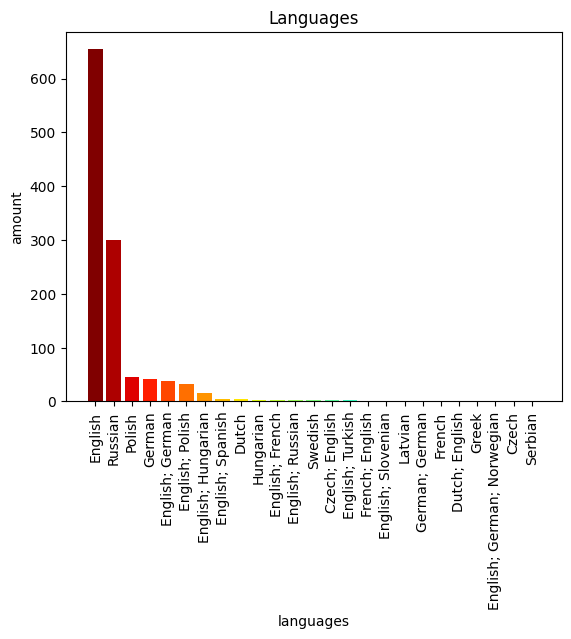

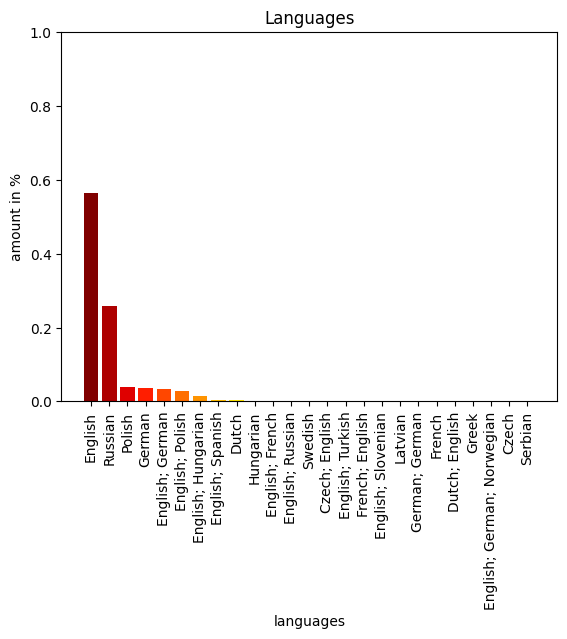

In [16]:
#count languages
print(df["Language"].value_counts())

print()

#count nan (empty) entries
miss_vals = df["Language"].isna().sum()
print(f'{miss_vals} missing values')

#calculate percentage of missing values
amount_miss_vals = miss_vals/df.shape[0]
print(f'{round(amount_miss_vals*100, 2)}% missing values')

print()

print(f'Mean: {df["Language"].value_counts().mean()}')
print(f'Median: {df["Language"].value_counts().median()}')
print(f'Standard Deviation: {df["Language"].value_counts().std()}')

print()

#sum of all languages
sum_all_lang = df["Language"].value_counts().sum()
print(f'{sum_all_lang} languages')
percent_all_lang = [i/sum_all_lang for i in df["Language"].value_counts().values]
print("percentage:", percent_all_lang)

#plot the values
plt.xticks(rotation=90)
cmap = plt.cm.jet
colors = cmap(np.linspace(1, 0, len(df["Language"].value_counts().values)))
plt.bar(df["Language"].value_counts().index, df["Language"].value_counts().values, color=colors)
plt.title("Languages")
plt.xlabel("languages")
plt.ylabel("amount")
plt.show()

print()

#plot the percentage
plt.xticks(rotation=90)
cmap = plt.cm.jet
colors = cmap(np.linspace(1, 0, len(percent_all_lang)))
plt.bar(df["Language"].value_counts().index, percent_all_lang, color=colors)
plt.title("Languages")
plt.xlabel("languages")
plt.ylabel("amount in %")
ax = plt.gca()
ax.set_ylim(0, 1)
plt.show()

#### Origin

In [17]:
df.query('Origin == "08.09.1997"')

,Title,Language,Origin,Start Date,End Date,Systems,Issues,Source,Duration
1119,Kendermag,NaN,08.09.1997,1997-09-08,1997-09-08,MS-DOS,Kendermag #1; Kendermag #16,Demozoo,0 days


In [18]:
df.query('Origin == "Polish"')

,Title,Language,Origin,Start Date,End Date,Systems,Issues,Source,Duration
2341,Virus,English; Polish,Polish,1995-08-01,1998-01-01,Commodore 64,"Virus #0,1 (polish); Virus #0,3 (polish); Viru...",CSDB; Internet Archive,884 days
2406,Wrotki,English; Polish,Polish,1994-09-03,1999-04-20,MS-DOS,Wrotki - Nowe Wcielenie 2; Wrotki - Nowe Wciel...,Demozoo,1690 days


In [19]:
df.query('Origin == "German"')

,Title,Language,Origin,Start Date,End Date,Systems,Issues,Source,Duration
2498,zzZACK64,English; German,German,1992-01-01,1992-01-01,Commodore 64,zzZACK64 2 (1992)( )(de); zzZACK64 4 (1992)( )...,Internet Archive; Kultboy,0 days


Origin
Russia             214
Belarus             52
Poland              51
Germany             40
Ukraine             30
Finland              8
The Netherlands      5
Latvia               5
USA                  4
Switzerland          4
Norway               4
Great Britain        3
France               3
Austria              2
Spain                2
Hungary              2
Portugal             2
Denmark              2
Israel               2
Belgium              2
Paraguay             1
Sweden               1
Slovenia             1
South Africa         1
Irland               1
Latin America        1
Uzbekistan           1
Australia            1
Czech Republic       1
Serbia               1
Name: count, dtype: int64

2053 missing values
82.12% missing values

Mean: 14.9
Median: 2.0
Standard Deviation: 40.325699857107466

447 origins
percentage: [0.47874720357941836, 0.116331096196868, 0.11409395973154363, 0.0894854586129754, 0.06711409395973154, 0.017897091722595078, 0.011185682326621925,

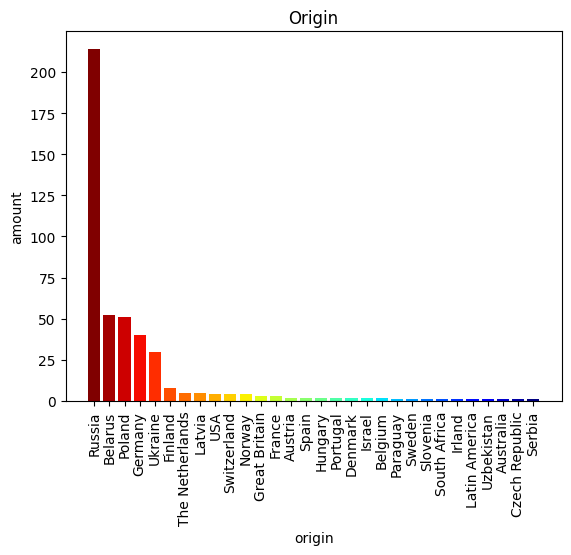

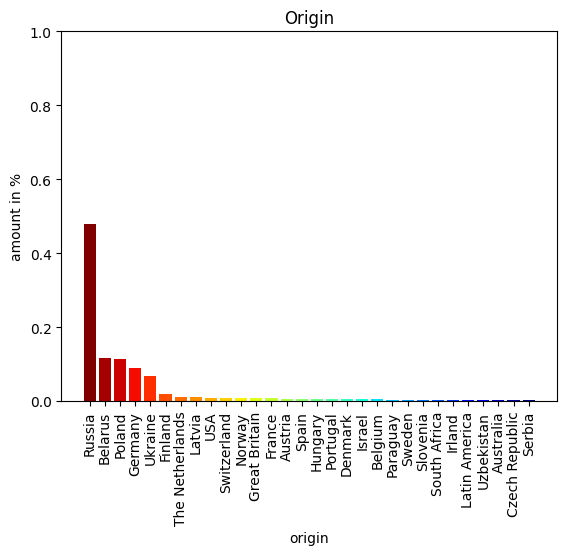

In [20]:
#drop the false entry "08.09.1997" and replace language polish by poland
#count origin
df = df.drop(df.index[df['Origin'] == '08.09.1997'])
df['Origin'].replace('Polish', 'Poland', inplace=True)
df['Origin'].replace('German', 'Germany', inplace=True)
print(df["Origin"].value_counts())

print()

#count nan (empty) entries values
miss_vals2 = df["Origin"].isna().sum()
print(f'{miss_vals2} missing values')

#calculate percentage of missing values
amount_miss_vals2 = miss_vals2/df.shape[0]
print(f'{round(amount_miss_vals2*100, 2)}% missing values')

print()

print(f'Mean: {df["Origin"].value_counts().mean()}')
print(f'Median: {df["Origin"].value_counts().median()}')
print(f'Standard Deviation: {df["Origin"].value_counts().std()}')

print()

#sum of all languages
sum_all_lang = df["Origin"].value_counts().sum()
print(f'{sum_all_lang} origins')
percent_all_lang = [i/sum_all_lang for i in df["Origin"].value_counts().values]
print("percentage:", percent_all_lang)

#plot the values
plt.xticks(rotation=90)
cmap = plt.cm.jet
colors = cmap(np.linspace(1, 0, len(df["Origin"].value_counts().values)))
plt.bar(df["Origin"].value_counts().index, df["Origin"].value_counts().values, color=colors)
plt.title("Origin")
plt.xlabel("origin")
plt.ylabel("amount")
plt.show()

print()

#plot the percentage
plt.xticks(rotation=90)
cmap = plt.cm.jet
colors = cmap(np.linspace(1, 0, len(percent_all_lang)))
plt.bar(df["Origin"].value_counts().index, percent_all_lang, color=colors)
plt.title("Origin")
plt.xlabel("origin")
plt.ylabel("amount in %")
ax = plt.gca()
ax.set_ylim(0, 1)
plt.show()

#### Systems

Systems
Commodore 64                                                 783
MS-DOS                                                       540
AMIGA OCS/ECS                                                349
ZX Spectrum                                                  327
ATARI ST/E                                                   102
                                                            ... 
NEC PC ENGINE                                                  1
AMSTRAD CPC; Amstrad Plus                                      1
AMIGA AGA; AMIGA OCS/ECS; AMIGA PPC/RTG; LINUX; WINDOWS        1
SAM COUPÉ                                                      1
AMIGA OCS/ECS; LINUX; MACOS; macOS; MacOSX Intel; WINDOWS      1
Name: count, Length: 64, dtype: int64

9 missing values
0.36% missing values

Mean: 38.921875
Median: 2.0
Standard Deviation: 129.6090953950647

2491 systems
percentage: [0.31433159373745484, 0.2167804094741068, 0.14010437575270976, 0.13127258129265354, 0.040947410678442396, 0

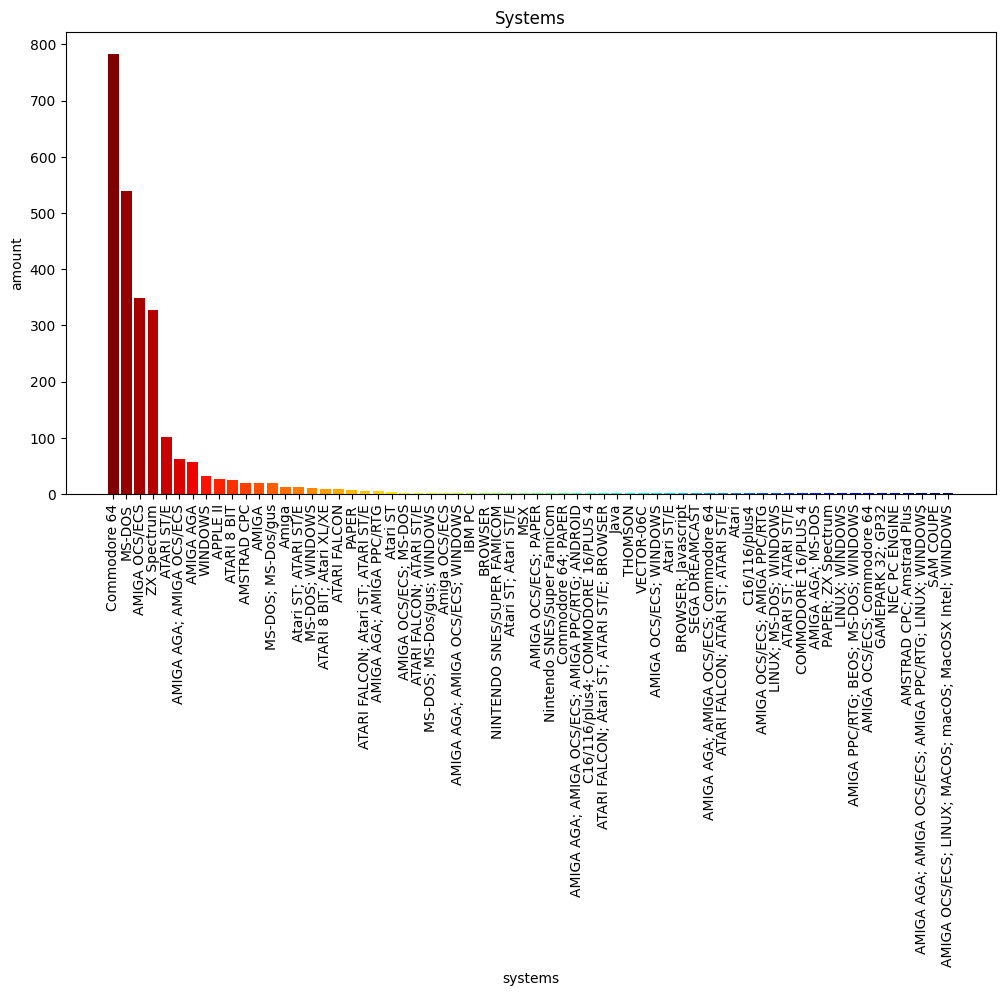

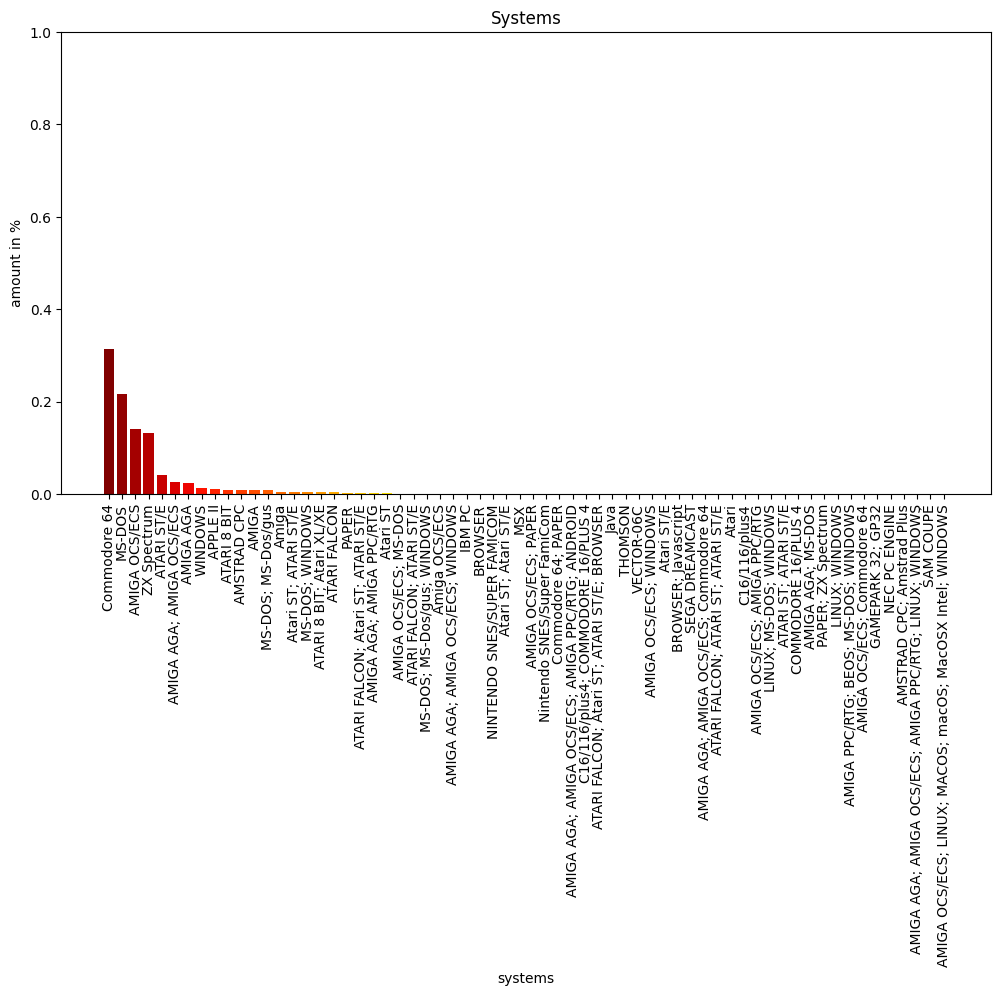

In [21]:
#count systems
print(df["Systems"].value_counts())

print()

#count nan (empty) entries values
miss_vals3 = df["Systems"].isna().sum()
print(f'{miss_vals3} missing values')

#calculate percentage of missing values
amount_miss_vals3 = miss_vals3/df.shape[0]
print(f'{round(amount_miss_vals3*100, 2)}% missing values')

print()

print(f'Mean: {df["Systems"].value_counts().mean()}')
print(f'Median: {df["Systems"].value_counts().median()}')
print(f'Standard Deviation: {df["Systems"].value_counts().std()}')

print()

#sum of all languages
sum_all_lang = df["Systems"].value_counts().sum()
print(f'{sum_all_lang} systems')
percent_all_lang = [i/sum_all_lang for i in df["Systems"].value_counts().values]
print("percentage:", percent_all_lang)

#plot the values
plt.figure(figsize=(12, 6))
plt.xticks(rotation=90)
cmap = plt.cm.jet
colors = cmap(np.linspace(1, 0, len(df["Systems"].value_counts().values)))
plt.bar(df["Systems"].value_counts().index, df["Systems"].value_counts().values, color=colors)
plt.title("Systems")
plt.xlabel("systems")
plt.ylabel("amount")
plt.show()

print()

#plot the percentage
plt.figure(figsize=(12, 6))
plt.xticks(rotation=90)
cmap = plt.cm.jet
colors = cmap(np.linspace(1, 0, len(percent_all_lang)))
plt.bar(df["Systems"].value_counts().index, percent_all_lang, color=colors)
plt.title("Systems")
plt.xlabel("systems")
plt.ylabel("amount in %")
ax = plt.gca()
ax.set_ylim(0, 1)
plt.show()

#### Source

Source
Demozoo                                                 728
Demozoo; Pouet                                          347
ZXpress                                                 296
Internet Archive                                        176
CSDB; Internet Archive                                  176
CSDB; Internet Archive; Pouet                           175
CSDB                                                    151
CSDB; Demozoo; Internet Archive; Pouet                  139
Pouet                                                    86
Demozoo; Pouet; Volko Encyclopedia                       56
Internet Archive (Apple II)                              24
Demozoo; Internet Archive; Pouet                         21
Kultboy                                                  19
CSDB; Pouet                                              18
Demozoo; Internet Archive                                15
Pouet; ZXpress                                           10
Demozoo; Pouet; ZXpress          

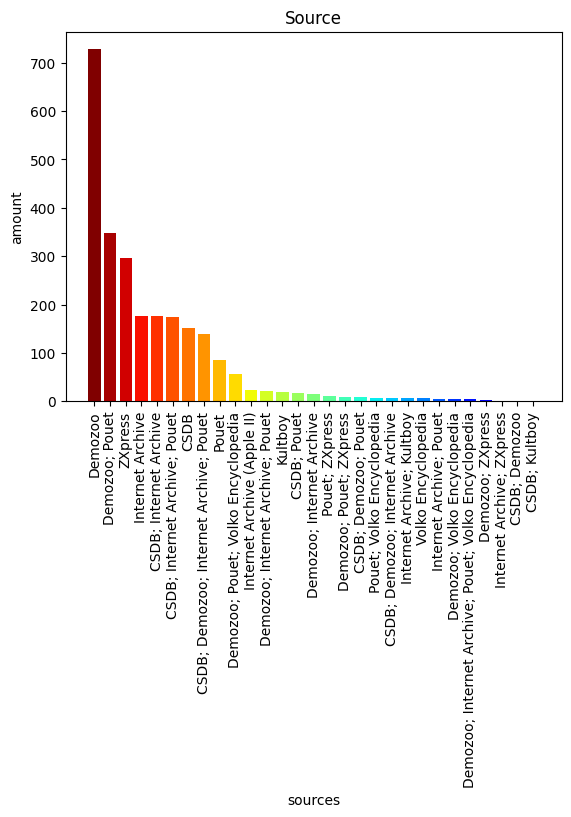

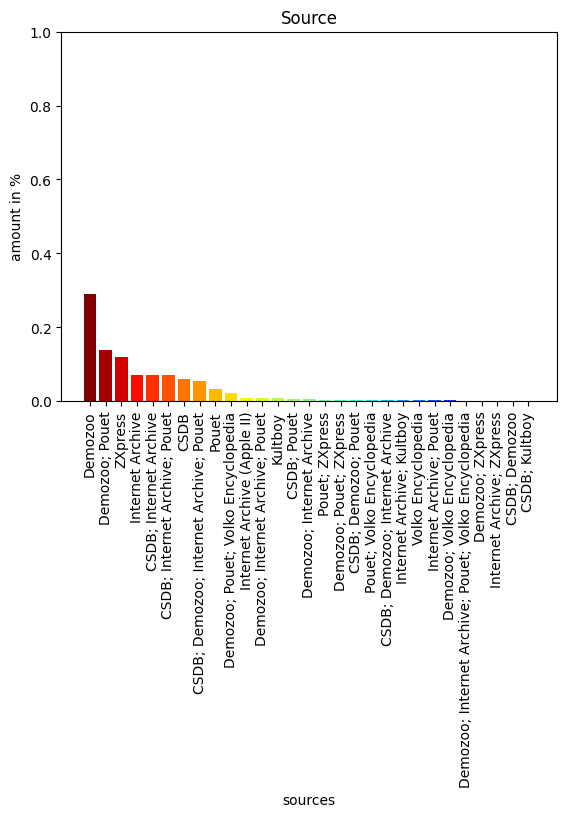

In [22]:
#count source
print(df["Source"].value_counts())

print()

#count nan (empty) entries values
miss_vals4 = df["Source"].isna().sum()
print(f'{miss_vals4} missing values')

#calculate percentage of missing values
amount_miss_vals4 = miss_vals4/df.shape[0]
print(f'{round(amount_miss_vals4*100, 2)}% missing values')

print()

print(f'Mean: {df["Source"].value_counts().mean()}')
print(f'Median: {df["Source"].value_counts().median()}')
print(f'Standard Deviation: {df["Source"].value_counts().std()}')

print()

#sum of all languages
sum_all_lang = df["Source"].value_counts().sum()
print(f'{sum_all_lang} sources')
percent_all_lang = [i/sum_all_lang for i in df["Source"].value_counts().values]
print("percentage:", percent_all_lang)

#plot the values
plt.xticks(rotation=90)
cmap = plt.cm.jet
colors = cmap(np.linspace(1, 0, len(df["Source"].value_counts().values)))
plt.bar(df["Source"].value_counts().index, df["Source"].value_counts().values, color=colors)
plt.title("Source")
plt.xlabel("sources")
plt.ylabel("amount")
plt.show()

print()

#plot the percentage
plt.xticks(rotation=90)
cmap = plt.cm.jet
colors = cmap(np.linspace(1, 0, len(percent_all_lang)))
plt.bar(df["Source"].value_counts().index, percent_all_lang, color=colors)
plt.title("Source")
plt.xlabel("sources")
plt.ylabel("amount in %")
ax = plt.gca()
ax.set_ylim(0, 1)
plt.show()

#### Duration

In [23]:
#count duration (skipping all 0 days entries)
#print(df["Duration"].value_counts())
filter_days = df[df['Duration'] > '0 days']
sort_filter_days = filter_days[["Title","Duration"]]
print(sort_filter_days.sort_values(by="Duration", ascending=False))

print()

#count nan (empty) entries values
miss_vals5 = df["Duration"].isna().sum()
print(f'{miss_vals5} missing values')

#calculate percentage of missing values
amount_miss_vals5 = miss_vals5/df.shape[0]
print(f'{round(amount_miss_vals5*100, 2)}% missing values')

print()

print(f'Mean: {filter_days["Duration"].value_counts().mean()}')
print(f'Median: {filter_days["Duration"].value_counts().median()}')
print(f'Standard Deviation: {filter_days["Duration"].value_counts().std()}')

print()

#sum of the whole duration
sum_duration = filter_days["Duration"].value_counts().sum()
print(f'{sum_duration} values in duration')
percent_duration = [i/sum_duration for i in filter_days["Duration"].value_counts().values]
#print("percentage:", percent_duration) #whole percentage list

                     Title   Duration
1625        Propaganda (2) 11715 days
2312        Vandalism News 11699 days
49                Addybook 11248 days
1742           Rock'n Role 10911 days
585           Digital Talk 10740 days
...                    ...        ...
2227  Tower Assault Review     1 days
2222        Total Disaster     1 days
311           C-Mag; C Mag     1 days
200                Balagan     1 days
1612               Prikoly     1 days

[1250 rows x 2 columns]

284 missing values
11.36% missing values

Mean: 1.8545994065281899
Median: 1.0
Standard Deviation: 2.333855339492087

1250 values in duration


#### Dates

In [24]:
@interact
def select_start_date(column='Start Date', x="2020-01-01"):
    return df.loc[df[column] > x]

interactive(children=(Text(value='Start Date', description='column'), Text(value='2020-01-01', description='x'…

In [25]:
print(df[["Start Date", "End Date"]].isna().sum())

Start Date    281
End Date      284
dtype: int64


In [26]:
#dates by date input
enter_date = input("Enter a valid date (YYYY-MM-DD)...")

#filter for dates later than 1990-01-01
date_filtered = df[df['Start Date'] > pd.to_datetime(enter_date)]

#print the dataframe
date_filtered = date_filtered[["Title", "Start Date", "End Date"]]

print(date_filtered)

Enter a valid date (YYYY-MM-DD)...01-01-2020
                            Title Start Date   End Date
162                 Ascii Express 2022-03-01 2022-03-18
591                    DiSCKetten 2021-12-24 2021-12-24
762                        FatMag 2023-03-01 2023-03-01
881   GO8BG; Good Old 8-Bit Games 2020-02-01 2020-02-21
1431               Nova Nekropola 2020-04-01 2020-04-15


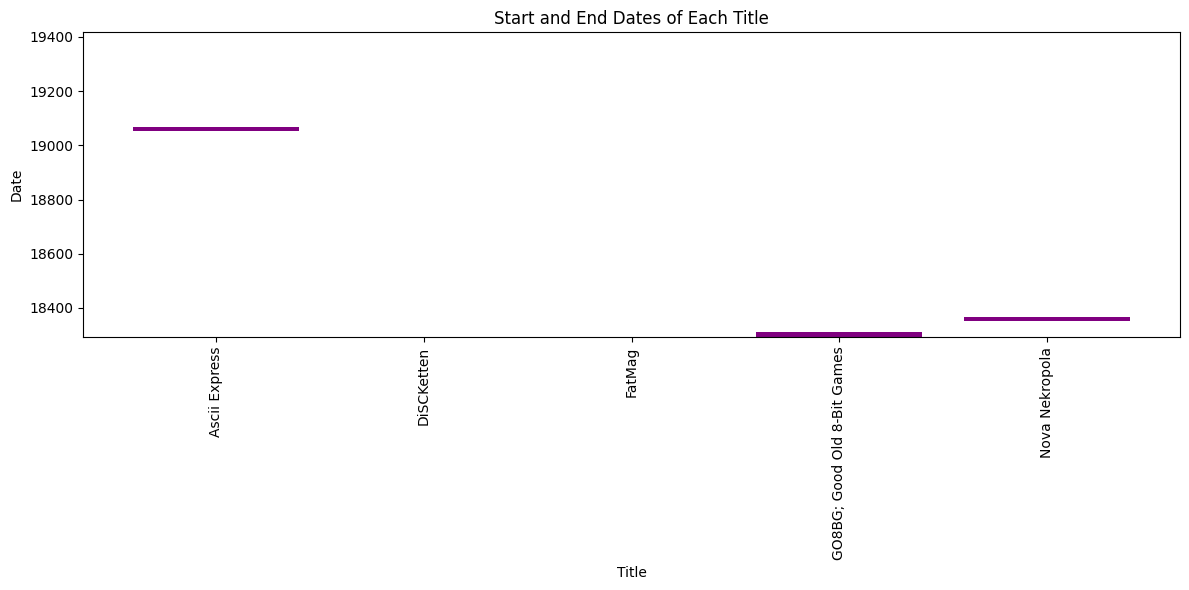

In [27]:
import matplotlib.pyplot as plt

# Convert Start Date and End Date to NumPy arrays
start_dates = date_filtered['Start Date'].to_numpy()
end_dates = date_filtered['End Date'].to_numpy()

# Calculate the widths of the bars
widths = end_dates - start_dates

# Create a stacked bar chart
plt.figure(figsize=(12, 6))
plt.bar(date_filtered['Title'], widths, bottom=start_dates, color="purple")
plt.xlabel('Title')
plt.ylabel('Date')
plt.title('Start and End Dates of Each Title')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [28]:
enter_origin = input("Enter a country...")
origin_query = df.query(f'Origin == "{enter_origin}"')
origin_query = origin_query[origin_query['Duration'] > "0 days"]
origin_query = origin_query[["Title","Origin", "Duration"]]
print(origin_query.sort_values(by="Duration", ascending=False))


Enter a country...Poland
                   Title  Origin  Duration
297                Budyn  Poland 2283 days
1630          Provocator  Poland 1891 days
2246             Trawnik  Poland 1863 days
2406              Wrotki  Poland 1690 days
2177  The Voice Dysk Mag  Poland 1461 days
2347            Vitality  Poland 1442 days
195         Bad News (2)  Poland 1384 days
1572    Poczytaj Mi Mamo  Poland 1340 days
1775              Savage  Poland 1338 days
2444             Zig Zag  Poland 1211 days
1602              Prawda  Poland 1188 days
627               Dragon  Poland  907 days
2341               Virus  Poland  884 days
1998        Strefa Mroku  Poland  758 days
2261             Trzepak  Poland  717 days
92                 Amber  Poland  699 days
1558              Planet  Poland  547 days
2050             Tankard  Poland  538 days
2446        Zig Zag Info  Poland  436 days
1633       Przypadkownik  Poland  366 days
1869            Sinister  Poland  365 days
1605       Prawda (Vega)  Pol

In [29]:
#make a new dataframe
df_year_filter = df



#drop NaN entries in specific columns
df_year_filter = df_year_filter.dropna(subset=['Start Date'])
df_year_filter = df_year_filter.dropna(subset=['End Date'])


#extract the year from the Start Date column
df_year_filter['Start Year'] = pd.to_datetime(df_year_filter['Start Date']).dt.year


#extract the year from the End Date column
df_year_filter['End Year'] = pd.to_datetime(df_year_filter['End Date']).dt.year


df_year_filter["Duration (years)"] = df_year_filter["End Year"] - df_year_filter["Start Year"]

#filter important entries
df_year_filter = df_year_filter[["Title", "Origin", "Start Year", "End Year", "Duration (years)"]]

# Print the DataFrame
print(df_year_filter)

                         Title   Origin  Start Year  End Year   
0                         #Z80   Russia        1998      2000  \
1            /FROZEN/ magazine      NaN        1999      1999   
2                         11th      NaN        1997      1997   
3        17 Bit Catalogue Disk      NaN        1990      1990   
4                           20   Russia        1999      2001   
...                        ...      ...         ...       ...   
2496  ZZTurbo / ZPower Catalog      NaN        1995      1995   
2497             ZZTV magazine      NaN        1999      2016   
2498                  zzZACK64  Germany        1992      1992   
2499                    ZZZine      NaN        1995      1995   
2500               Возраждение   Russia        1996      1996   

      Duration (years)  
0                    2  
1                    0  
2                    0  
3                    0  
4                    2  
...                ...  
2496                 0  
2497               

In [30]:
enter_year_origin = input("Enter a country...")
dfyf_enter_origin = df_year_filter.query(f'Origin == "{enter_year_origin}"') #dfyf: dataframe year filter -> enter origin
dfyf_enter_origin = dfyf_enter_origin[dfyf_enter_origin['Duration (years)'] > 0]
dfyf_enter_origin = dfyf_enter_origin[["Title","Origin", "Start Year", "End Year", "Duration (years)"]]
print(dfyf_enter_origin.sort_values(by="Duration (years)", ascending=False))

print("\n\n\nStatistitcs\n")
print(dfyf_enter_origin.describe())

Enter a country...Poland
                   Title  Origin  Start Year  End Year  Duration (years)
297                Budyn  Poland        1996      2002                 6
2406              Wrotki  Poland        1994      1999                 5
1630          Provocator  Poland        1996      2001                 5
2246             Trawnik  Poland        1994      1999                 5
2177  The Voice Dysk Mag  Poland        1991      1995                 4
195         Bad News (2)  Poland        1992      1996                 4
2347            Vitality  Poland        1994      1998                 4
1602              Prawda  Poland        1993      1997                 4
1572    Poczytaj Mi Mamo  Poland        1992      1996                 4
2444             Zig Zag  Poland        1991      1994                 3
1775              Savage  Poland        2004      2007                 3
2341               Virus  Poland        1995      1998                 3
1998        Strefa Mroku  

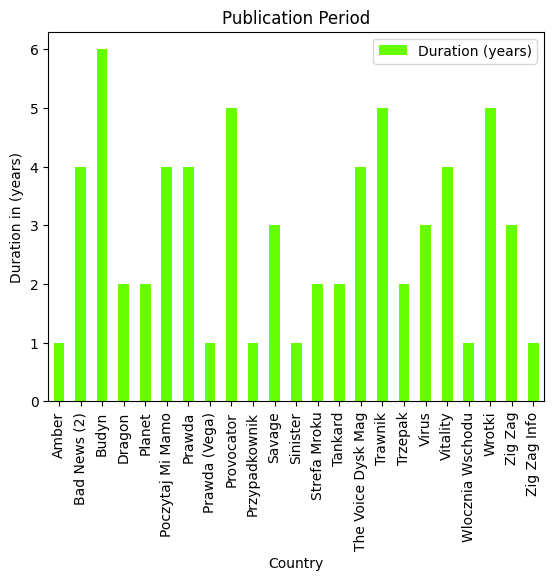

In [31]:
average_duration_per_country = dfyf_enter_origin.groupby('Title')['Duration (years)'].mean()
average_duration_per_country.plot(kind='bar', color='#66ff00')
plt.title('Publication Period')
plt.xlabel('Country')
plt.ylabel('Duration in (years)')
plt.legend()
plt.show()

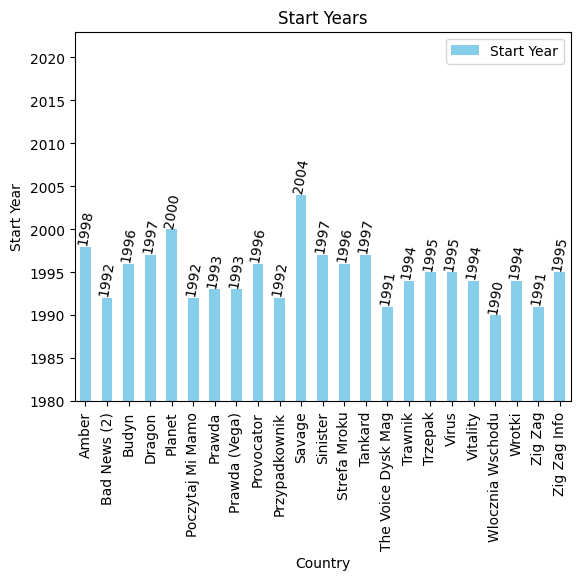

In [32]:
average_duration_per_country = dfyf_enter_origin.groupby('Title')['Start Year'].mean()
average_duration_per_country.plot(kind='bar', color='skyblue')
plt.title('Start Years')
plt.xlabel('Country')
plt.ylabel('Start Year')


for i, value in enumerate(dfyf_enter_origin["Start Year"]):
    plt.annotate(str(value), (i, value + 0.1), ha='center', va='bottom', rotation=80)

#plt.xlim(0, 10)
plt.ylim(1980, 2023) #earliest entry of all recorded magazines was 1980 (see serveral code cells above), latest 2023
plt.legend()
plt.show()

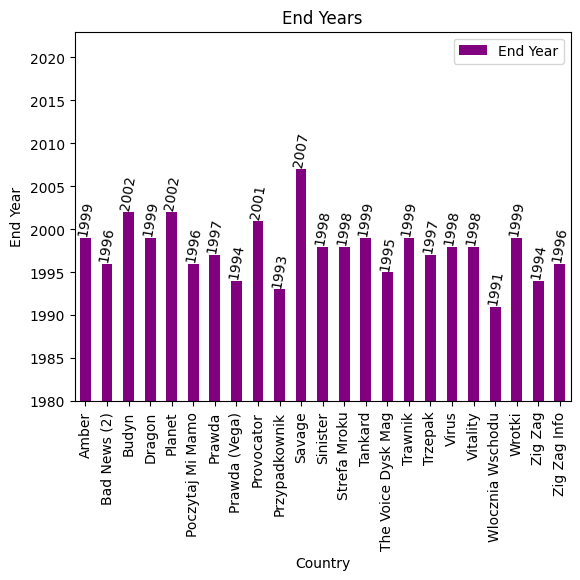

In [33]:
average_duration_per_country = dfyf_enter_origin.groupby('Title')['End Year'].mean()
average_duration_per_country.plot(kind='bar', color='purple')
plt.title('End Years')
plt.xlabel('Country')
plt.ylabel('End Year')

for i, value in enumerate(dfyf_enter_origin["End Year"]):
    plt.annotate(str(value), (i, value + 0.1), ha='center', va='bottom', rotation=80)

#plt.xlim(0, 10)
plt.ylim(1980, 2023) #earliest entry of all recorded magazines was 1980 (see serveral code cells above), latest 2023
plt.legend()
plt.show()

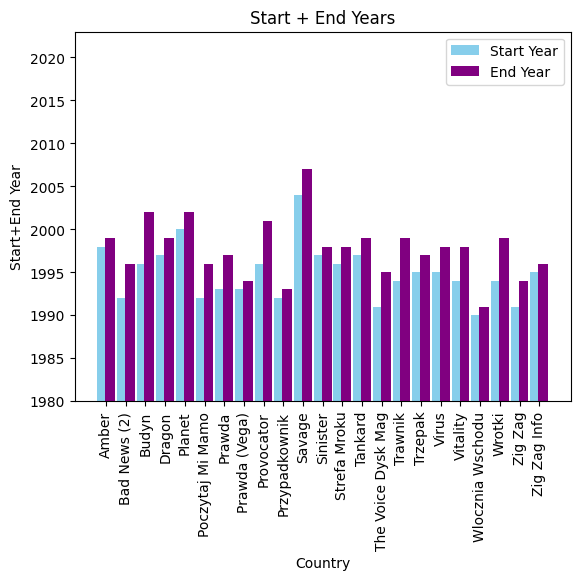

In [34]:
average_duration_per_country = dfyf_enter_origin.groupby('Title')['Start Year'].mean()
average_duration_per_country2 = dfyf_enter_origin.groupby('Title')['End Year'].mean()

X_axis = np.arange(len(dfyf_enter_origin["Title"])) 
plt.bar(X_axis - 0.2, dfyf_enter_origin["Start Year"], 0.5, label = 'Start Year', color="skyblue")
plt.bar(X_axis + 0.2, dfyf_enter_origin["End Year"], 0.5, label = 'End Year', color="purple")
                                        
plt.title('Start + End Years')
plt.xlabel('Country')
plt.ylabel('Start+End Year')
    

plt.xticks(X_axis, dfyf_enter_origin["Title"], rotation=90)     

#plt.xlim(0, 10)
plt.ylim(1980, 2023) #earliest entry of all recorded magazines was 1980 (see serveral code cells above), latest 2023
plt.legend()
plt.show()

### Show relations between columns

In [35]:
print(df["Language"].unique())

print()

print(df[['Language', 'Origin']].value_counts())
print()
print(df[['Origin', 'Systems']].value_counts())
print()
print(df[['Origin', 'Source']].value_counts())
print()
print(df[['Language', 'Source']].value_counts())

#print()
#print(df[(df["Origin"] == "Germany") & (df["Systems"] == "Commodore 64")].value_counts().sum())


['Russian' nan 'English' 'English; German' 'Polish' 'English; Polish'
 'German' 'English; Russian' 'English; Spanish' 'Dutch'
 'English; Slovenian' 'English; Hungarian' 'French; English'
 'English; French' 'Latvian' 'Swedish' 'Czech; English' 'Hungarian'
 'English; Turkish' 'German; German' 'French' 'Dutch; English' 'Greek'
 'English; German; Norwegian' 'Czech' 'Serbian']

Language                    Origin         
Russian                     Russia             210
                            Belarus             52
Polish                      Poland              38
German                      Germany             30
Russian                     Ukraine             29
English; Polish             Poland              10
English                     Finland              8
English; German             Germany              6
Russian                     Latvia               4
English                     The Netherlands      4
                            USA                  4
                   

In [36]:
from sklearn.metrics import normalized_mutual_info_score


df_drop = df.dropna()

# Calculate the mutual information score
corr_lang_or = normalized_mutual_info_score(df_drop['Language'], df_drop['Origin'])
corr_lang_sys = normalized_mutual_info_score(df_drop['Language'], df_drop['Systems'])
corr_lang_src = normalized_mutual_info_score(df_drop['Language'], df_drop['Source'])
corr_or_sys = normalized_mutual_info_score(df_drop['Origin'], df_drop['Systems'])
corr_or_src = normalized_mutual_info_score(df_drop['Origin'], df_drop['Source'])


# Print the correlation coefficient
print("Normalized mutual information scores (0.0=low, 1.0=high):")
print(f'Language - Origin: \t{corr_lang_or}')
print(f'Language - System: \t{corr_lang_sys}')
print(f'Language - Source: \t{corr_lang_src}')
print(f'Origin - System: \t{corr_or_sys}')
print(f'Origin - Source: \t{corr_or_src}')


Normalized mutual information scores (0.0=low, 1.0=high):
Language - Origin: 	0.6226399508910208
Language - System: 	0.7001598984984161
Language - Source: 	0.6839443052104133
Origin - System: 	0.5315093463043219
Origin - Source: 	0.4927362146588747


### Guessing the missing values

#### Preparation

In [37]:
df_drop = df.dropna()
df_drop

,Title,Language,Origin,Start Date,End Date,Systems,Issues,Source,Duration
0,#Z80,Russian,Russia,1998-05-07,2000-03-09,ZX Spectrum,#Z80 #01; #Z80 #02; #Z80 #03; #Z80 #04; #Z80 #...,ZXpress,672 days
4,20,Russian,Russia,1999-12-12,2001-12-17,ZX Spectrum,20 #01; 20 #02; 20 #03; 20 #04; 20 #05,ZXpress,736 days
5,200,Russian,Russia,1994-08-01,1995-07-01,ZX Spectrum,200 #A; 200 #B; 200 #D; 200 #G; 200 #W,ZXpress,334 days
7,3Bit,Russian,Ukraine,2005-01-01,2005-01-03,ZX Spectrum,3Bit #01; 3Bit #1,Demozoo; ZXpress,2 days
38,Acid Paper,Russian,Russia,2000-12-29,2000-12-29,ZX Spectrum,Acid Paper #01; Acid Paper #02; Acid Paper #03...,ZXpress,0 days
...,...,...,...,...,...,...,...,...,...
2490,ZX Zone,Russian,Russia,2004-08-10,2005-02-15,ZX Spectrum,ZX Zone #01; ZX Zone #02; ZX Zone #03; ZX Zone...,ZXpress,189 days
2491,ZX-Files,Russian,Russia,2000-12-29,2000-12-29,ZX Spectrum,ZX-Files #01,ZXpress,0 days
2492,ZX-News,Russian,Russia,1996-09-01,2000-12-30,ZX Spectrum,ZX-News #01; ZX-News #02; ZX-News #03; ZX-News...,ZXpress,1581 days
2498,zzZACK64,English; German,Germany,1992-01-01,1992-01-01,Commodore 64,zzZACK64 2 (1992)( )(de); zzZACK64 4 (1992)( )...,Internet Archive; Kultboy,0 days


In [38]:
df_to_fill = df[df.isna().any(axis=1)]
df_to_fill

,Title,Language,Origin,Start Date,End Date,Systems,Issues,Source,Duration
1,/FROZEN/ magazine,NaN,NaN,1999-08-07,1999-08-07,MS-DOS,/FROZEN/ magazine,Internet Archive,0 days
2,11th,NaN,NaN,1997-11-11,1997-11-11,MS-DOS,11th #1,Demozoo,0 days
3,17 Bit Catalogue Disk,English,NaN,1990-03-01,1990-03-01,AMIGA,17 Bit Catalogue Disk - March/April 1990,Internet Archive,0 days
6,3 Years APS,English,NaN,1996-03-01,1996-04-08,Commodore 64,3 Years APS; 3 Years APS (1996 04 08)(The Art ...,CSDB; Internet Archive; Pouet,38 days
8,3D Realms Catalog,NaN,NaN,1995-06-01,1995-06-01,MS-DOS,3D Realms Catalog - June 1995,Internet Archive,0 days
...,...,...,...,...,...,...,...,...,...
2494,ZZT Warriors magazine,NaN,NaN,1997-02-11,1997-04-03,MS-DOS,ZZT Warriors magazine #1; ZZT Warriors magazin...,Internet Archive,51 days
2495,ZZTeam magazine,NaN,NaN,1995-01-01,1995-10-19,MS-DOS,ZZTeam magazine #1; ZZTeam magazine #2; ZZTeam...,Internet Archive,291 days
2496,ZZTurbo / ZPower Catalog,NaN,NaN,1995-11-07,1995-11-07,MS-DOS,ZZTurbo / ZPower Catalog 1996,Internet Archive,0 days
2497,ZZTV magazine,NaN,NaN,1999-01-03,2016-08-24,MS-DOS,ZZTV magazine #1; ZZTV magazine #10; ZZTV maga...,Internet Archive,6443 days


#### Showing which number represents a distinct category

In [39]:
origin_uniques_dict = {}
origin_uniques = df_drop["Origin"].unique()
for i, el in enumerate(origin_uniques):
    print(i, el)

#for a dict
"""for i, el in enumerate(origin_uniques):
    origin_uniques_dict[i] = el
print(origin_uniques_dict)"""

0 Russia
1 Ukraine
2 Belarus
3 Poland
4 Germany
5 Irland
6 Belgium
7 Slovenia
8 Sweden
9 Israel
10 The Netherlands
11 Denmark
12 Norway
13 France
14 Paraguay
15 Latvia
16 Hungary
17 Spain
18 USA
19 Finland
20 Austria
21 Portugal
22 Switzerland
23 South Africa
24 Great Britain
25 Latin America
26 Uzbekistan
27 Australia


'for i, el in enumerate(origin_uniques):\n    origin_uniques_dict[i] = el\nprint(origin_uniques_dict)'

In [40]:
lang_uniques_dict = {}
lang_uniques = df_drop["Language"].unique()
for i, el in enumerate(lang_uniques):
    print(i, el)

0 Russian
1 English
2 German
3 English; Russian
4 English; German
5 English; Polish
6 English; Slovenian
7 Polish
8 French; English
9 English; Spanish
10 Latvian
11 English; Hungarian
12 Dutch; English
13 English; German; Norwegian


In [41]:
sys_uniques_dict = {}
sys_uniques = df_drop["Systems"].unique()
for i, el in enumerate(sys_uniques):
    print(i, el)

0 ZX Spectrum
1 MS-DOS
2 Amiga
3 AMIGA OCS/ECS; WINDOWS
4 MS-DOS; MS-Dos/gus
5 Commodore 64
6 MS-DOS; WINDOWS
7 AMIGA AGA
8 AMIGA OCS/ECS
9 AMIGA PPC/RTG; BEOS; MS-DOS; WINDOWS
10 IBM PC
11 APPLE II
12 WINDOWS
13 AMIGA AGA; AMIGA OCS/ECS
14 ATARI ST/E
15 MS-DOS; MS-Dos/gus; WINDOWS
16 AMIGA OCS/ECS; LINUX; MACOS; macOS; MacOSX Intel; WINDOWS


In [42]:
src_uniques_dict = {}
src_uniques = df_drop["Source"].unique()
for i, el in enumerate(src_uniques):
    print(i, el)

0 ZXpress
1 Demozoo; ZXpress
2 Demozoo; Pouet; ZXpress
3 Demozoo; Internet Archive; Pouet; Volko Encyclopedia
4 Kultboy
5 Demozoo; Pouet; Volko Encyclopedia
6 Pouet; Volko Encyclopedia
7 CSDB; Internet Archive; Pouet
8 Pouet; ZXpress
9 Pouet
10 Demozoo
11 CSDB
12 Internet Archive; Kultboy
13 Internet Archive (Apple II)
14 Demozoo; Pouet
15 Demozoo; Volko Encyclopedia
16 CSDB; Internet Archive
17 Volko Encyclopedia
18 CSDB; Demozoo; Internet Archive; Pouet


#### Converting categories to numbers

In [43]:
df_drop = df_drop[['Title', 'Language', 'Origin', 'Systems', 'Source']]
df_num = df_drop.copy()
df_num['Title'] = pd.factorize(df_num['Title'])[0]
df_num['Origin'] = pd.factorize(df_num['Origin'])[0]
df_num['Language'] = pd.factorize(df_num['Language'])[0]
df_num['Systems'] = pd.factorize(df_num['Systems'])[0]
df_num['Source'] = pd.factorize(df_num['Source'])[0]

In [44]:
df_num

,Title,Language,Origin,Systems,Source
0,0,0,0,0,0
4,1,0,0,0,0
5,2,0,0,0,0
7,3,0,1,0,1
38,4,0,0,0,0
...,...,...,...,...,...
2490,361,0,0,0,0
2491,362,0,0,0,0
2492,363,0,0,0,0
2498,364,4,4,5,12


#### Correlation Matrix

             Title  Language    Origin   Systems    Source
Title     1.000000  0.123046  0.106175  0.137004  0.158853
Language  0.123046  1.000000  0.285870  0.648080  0.743643
Origin    0.106175  0.285870  1.000000  0.322055  0.341560
Systems   0.137004  0.648080  0.322055  1.000000  0.678769
Source    0.158853  0.743643  0.341560  0.678769  1.000000


<Axes: >

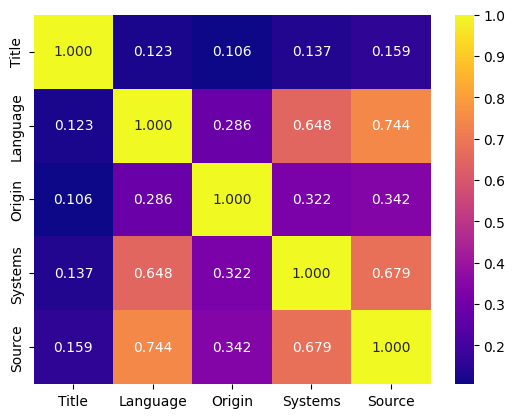

In [45]:
corr_matrix = df_num.corr()
print(corr_matrix)

sns.heatmap(corr_matrix, annot=True, fmt=".3f", cmap="plasma")

#### Making predictions

In [46]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Assuming you have a DataFrame with your training data, let's call it df_train
# Split the data into training and test sets
category_input = input("Enter \"Title\", \"Source\", \"Origin\" or \"Systems\" please...\n" )
print()
X_train = df_num[['Title', 'Source', 'Origin', 'Systems']]
y_train = df_num[category_input]

X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

# Train the logistic regression classifier
clf = LogisticRegression(solver="sag", max_iter=10000)  # Increase max_iter for convergence
clf.fit(X_train, y_train)

y_pred = clf.predict(X_train)

print(y_pred)

Enter "Title", "Source", "Origin" or "Systems" please...
Origin

[ 0  0 19  0  0  2  2  0  3  0  0  3  0  0  3  0  0  3  3  0  0  0 19  4
  1  4  0  0  2  0  4  0  0  0 19  2  0  0  0 20  4  3  0 19  2  5  2  0
  0  0  0  0  2  1 10  2  0  0  3  0 19  3  4  0 20  0  0  0  2  0  0  1
 19  0  2  4 19  0  0 22  0  0  2  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  2  0  0  0  0  0  0  0  3  0  0  0  0  0 10 19  3  3  0  0  0  2  0
  2 22 19  0  0  0  2  0  0  0  4  0 15  3 19  2  2  0  0  0  2  0  2  0
 19  0  3  4  3  2  3  0  3 20  0  0  3  0  0  0  0  0  0  0  0  0 13  0
  3  0 19  0  4  3  0  2  0  3 15  3  4  0  0  0  0  0  0  2  0 19  2 19
  4  0  4  0  0 19  0  0  0  0  0 10  2  0  0  0  0  0  0  4  0  3  0  0
  0  0  0  0  3  2  2  0  0 19  3  0  3  2  3  0  2  0  3  0  3  0 20 19
  0 19  0 10  0  2  4  0  0 15 19  0  3  3  3  0  0  0  2  0  0  0  2 22
  0  0  0  0  2  0  2  4  0  2]


In [47]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import warnings

warnings.filterwarnings("ignore")

average_param = input("Enter the desired parameter (micro, macro or weighted)...")
#https://www.mariakhalusova.com/posts/2019-04-17-ml-model-evaluation-metrics-p2/
#Micro-averaged Precision is calculated as precision of Total values:
#Macro-averaged Precision is calculated as an average of Precisions of all classes:
#Weighted-averaged Precision is also calculated based on Precision per class but takes into account the number of samples of each class in the data:

print("accuracy:", accuracy_score(y_train, y_pred))
print("precision:", precision_score(y_train, y_pred, average=average_param))
print("recall:", recall_score(y_train, y_pred, average=average_param))
print("f1 score:", f1_score(y_train, y_pred, average=average_param))

Enter the desired parameter (micro, macro or weighted)...macro
accuracy: 0.7846715328467153
precision: 0.2615198265758787
recall: 0.29856532356532356
f1 score: 0.2569272782176008


In [48]:
#create a dictionary with the feature values for the new entry
magazine = int(input("Enter the number for the magazine (max value should not exceed 246)..."))
source = int(input("Enter a number for source..."))
origin = int(input("Enter a number for origin..."))
systems = int(input("Enter a number for systems..."))


new_entry = {
    'Title': magazine,  
    'Source': source,   
    'Origin': origin,    
    'Systems': systems    
}

#convert the dictionary to a dataframe
new_data = pd.DataFrame([new_entry])

#make predictions on the new entry
predicted_class = clf.predict(new_data)

#print the predicted class
print("Predicted class:", predicted_class[0])

Enter the number for the magazine (max value should not exceed 246)...1
Enter a number for source...1
Enter a number for origin...1
Enter a number for systems...1
Predicted class: 5
